In [223]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

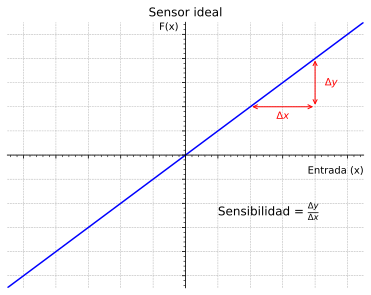

In [224]:
#| label: sensivity-ideal-sensor
#| fig-cap: ""

# Datos para la recta de pendiente 1
x = np.linspace(-5.5, 5.5, 100)
y = x  # pendiente = 1

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Dibujar la recta
ax.plot(x, y, label='Salida del sensor: F(x) = x', color='blue')

# Dibujar ejes en el centro
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Etiquetas en español
ax.set_xlabel('Entrada (x)', loc='right')
ax.set_ylabel('F(x)', rotation=0, labelpad=0, loc='top', va='top')

# Marcar Δx y Δy
x0 = 2
dx = 2
dy = dx  # porque pendiente es 1

# Puntos donde se evalúa delta
# ax.plot([x0, x0 + dx], [x0, x0 + dx], 'ro')  # puntos sobre la recta

ax.annotate('', xy=(x0 + dx, x0), xytext=(x0, x0),
            arrowprops=dict(arrowstyle='<->', color='red'))
ax.annotate(r'$\Delta x$', xy=(x0 + dx/2, x0 - 0.5), ha='center', color='red')

ax.annotate('', xy=(x0 + dx, x0 + dx), xytext=(x0 + dx, x0),
            arrowprops=dict(arrowstyle='<->', color='red'))
ax.annotate(r'$\Delta y$', xy=(x0 + dx + 0.3, x0 + dx/2), va='center', color='red')

# Mostrar fórmula de sensibilidad
ax.text(1, -2.5, r'Sensibilidad = $\frac{{\Delta y}}{{\Delta x}}$', fontsize=12)

# Límites
ax.set_xlim(-5.5, 5.5)
ax.set_ylim(-5.5, 5.5)

# Ticks visibles pero sin etiquetas
ax.set_xticks(np.arange(-5, 6, 1))
ax.set_yticks(np.arange(-5, 6, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])

# Cuadrículas
ax.minorticks_on()
ax.grid(True, which='major', linestyle='--', linewidth=0.5)
# ax.grid(True, which='minor', linestyle=':', linewidth=0.3)

# Título y leyenda
plt.title('Sensor ideal')
# ax.legend(loc='upper left')

plt.show()

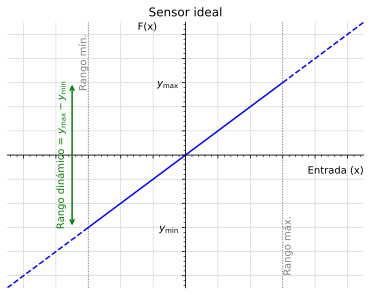

In [225]:
#| label: range-ideal-sensor
#| fig-cap: ""

# Definir el rango de entrada válido del sensor
rango_min = -3
rango_max = 3

# Crear dominios para cada parte de la recta
x_dentro = np.linspace(rango_min, rango_max, 100)
x_fuera_izq = np.linspace(-5.5, rango_min, 100)
x_fuera_der = np.linspace(rango_max, 5.5, 100)

# Salida del sensor
y_dentro = x_dentro
y_fuera_izq = x_fuera_izq
y_fuera_der = x_fuera_der

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Recta dentro del rango (línea sólida)
ax.plot(x_dentro, y_dentro, color='blue', label='Salida del sensor válida')

# Recta fuera del rango (línea punteada)
ax.plot(x_fuera_izq, y_fuera_izq, color='blue', linestyle='dashed')
ax.plot(x_fuera_der, y_fuera_der, color='blue', linestyle='dashed', label='Fuera del rango')

# Dibujar ejes en el centro
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Etiquetas en español
ax.set_xlabel('Entrada (x)', loc='right')
# ax.set_ylabel('Salida (F(x))', loc='top')
ax.set_ylabel('F(x)', rotation=0, labelpad=0, loc='top', va='top')

y_min = rango_min
y_max = rango_max
# Supongamos que ya tenés y_min y y_max definidos
yticks = np.arange(-5, 6, 1).tolist()  # ticks regulares
yticks += [y_min, y_max]              # agregar los valores deseados
yticks = sorted(set(yticks))          # ordenar y evitar duplicados

# Ticks visibles pero sin etiquetas
ax.set_xticks(np.arange(-5, 6, 1))
# ax.set_yticks(np.arange(-5, 6, 1))
ax.set_yticks(yticks)
ax.set_xticklabels([])

# Etiquetas vacías excepto en y_min y y_max
yticklabels = ['' for _ in yticks]
if y_min in yticks:
    yticklabels[yticks.index(y_min)] = r'$y_{\mathrm{min}}$'
if y_max in yticks:
    yticklabels[yticks.index(y_max)] = r'$y_{\mathrm{max}}$'
ax.set_yticklabels(yticklabels)

# Cuadrículas
ax.minorticks_on()
ax.grid(True, which='major', linestyle='--', linewidth=0.5)
# ax.grid(True, which='minor', linestyle=':', linewidth=0.3)

# Quitar spines completamente
# for spine in ax.spines.values():
#     spine.set_visible(False)

# Límites
ax.set_xlim(-5.5, 5.5)
ax.set_ylim(-5.5, 5.5)

# Rango del sensor (líneas grises)
ax.axvline(rango_min, color='gray', linestyle=':', linewidth=1)
ax.axvline(rango_max, color='gray', linestyle=':', linewidth=1)
ax.text(rango_min, 5, 'Rango mín.', rotation=90, ha='right', va='top', color='gray')
ax.text(rango_max, -5, 'Rango máx.', rotation=90, ha='left', va='bottom', color='gray')

# Marcar rango dinámico en el eje Y
ax.annotate('', xy=(-3.5, rango_max), xytext=(-3.5, rango_min),
            arrowprops=dict(arrowstyle='<->', color='green', linewidth=1.5))

# Etiqueta del rango dinámico
ax.text(-4, 0, r'Rango dinámico = $y_{\mathrm{max}} - y_{\mathrm{min}}$', color='green', rotation=90,
        va='center', ha='left', fontsize=10)

# Mostrar fórmula del rango dinámico
# ax.text(1, -2, r'$R_{dyn}$ = $y_{\mathrm{max}} - y_{\mathrm{min}}$', fontsize=12, color='green')

# Título y leyenda
plt.title('Sensor ideal')
# ax.legend(loc='upper left')

plt.show()

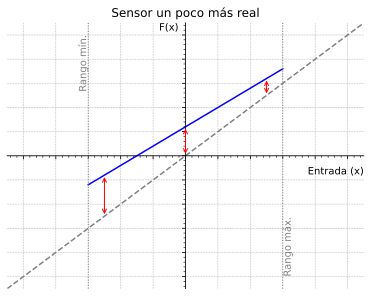

In [226]:
#| label: accuracy-ideal-sensor
#| fig-cap: ""

# Definimos resolución del sensor
resolucion = 0.5
x_min, x_max = -3, 3
offset = 1.2
ganancia = 0.8  # error de sensibilidad

x_vals = np.linspace(x_min, x_max, 100)
# Salidas ideal y real
y_ideal = x_vals
y_real = ganancia * x_vals + offset

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Línea ideal
ax.plot(x, y, color='gray', linestyle='dashed')

# Línea real con offset y error de ganancia
ax.plot(x_vals, y_real, color='blue', label='Sensor real')

y_min = ganancia * x_min + offset
y_max = ganancia * x_max + offset

# Flechas para marcar error (en extremos)
for x in [-2.5, 0, 2.5]:
    y_id = x
    y_re = ganancia * x + offset
    ax.annotate('', xy=(x, y_re), xytext=(x, y_id),
                arrowprops=dict(arrowstyle='<->', color='red'))
    # ax.text(x + 0.1, (y_id + y_re)/2, 'Error', color='red', fontsize=8)

# Dibujar ejes en el centro
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Etiquetas en español
ax.set_xlabel('Entrada (x)', loc='right')
# ax.set_ylabel('Salida (F(x))', loc='top')
ax.set_ylabel('F(x)', rotation=0, labelpad=0, loc='top', va='top')

# Ticks visibles pero sin etiquetas
ax.set_xticks(np.arange(-5, 6, 1))
ax.set_yticks(np.arange(-5, 6, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])

# Cuadrículas
ax.minorticks_on()
ax.grid(True, which='major', linestyle='--', linewidth=0.5)
# ax.grid(True, which='minor', linestyle=':', linewidth=0.3)

# Límites
ax.set_xlim(-5.5, 5.5)
ax.set_ylim(-5.5, 5.5)

# Rango del sensor (líneas grises)
ax.axvline(rango_min, color='gray', linestyle=':', linewidth=1)
ax.axvline(rango_max, color='gray', linestyle=':', linewidth=1)
ax.text(rango_min, 5, 'Rango mín.', rotation=90, ha='right', va='top', color='gray')
ax.text(rango_max, -5, 'Rango máx.', rotation=90, ha='left', va='bottom', color='gray')

# Título y leyenda
plt.title('Sensor un poco más real')
# ax.legend(loc='upper left')

plt.show()

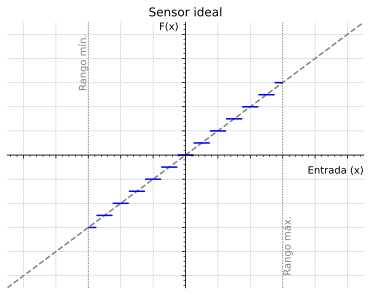

In [227]:
#| label: resolution-ideal-sensor
#| fig-cap: ""

# Definimos resolución del sensor
resolucion = 0.5
x_min, x_max = -3, 3

# Escalones del sensor
x_edges = np.arange(x_min, x_max, resolucion)
y_steps = np.floor(x_edges / resolucion) * resolucion

# Crear la figura y los ejes
fig, ax = plt.subplots()

x_dentro = np.linspace(-5.5, 5.5, 100)
# Salida del sensor
y_dentro = x_dentro
ax.plot(x_dentro, y_dentro, color='gray', linestyle='dashed')

# Dibujar escalones centrados (sin último medio escalón)
for val in np.arange(x_min, x_max + resolucion/2, resolucion):
    y_val = np.floor(val / resolucion) * resolucion
    x_left = val - resolucion / 2
    x_right = val + resolucion / 2
    
    if x_left < x_min:
        x_left = x_min
    
    if x_right > x_max:
        x_right = x_max

    ax.hlines(y_val, x_left, x_right, color='blue')

# Dibujar ejes en el centro
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Etiquetas en español
ax.set_xlabel('Entrada (x)', loc='right')
# ax.set_ylabel('Salida (F(x))', loc='top')
ax.set_ylabel('F(x)', rotation=0, labelpad=0, loc='top', va='top')

# Ticks visibles pero sin etiquetas
ax.set_xticks(np.arange(-5, 6, 1))
ax.set_yticks(np.arange(-5, 6, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])

# Cuadrículas
ax.minorticks_on()
ax.grid(True, which='major', linestyle='--', linewidth=0.5)
# ax.grid(True, which='minor', linestyle=':', linewidth=0.3)

# Quitar spines completamente
# for spine in ax.spines.values():
#     spine.set_visible(False)

# Límites
ax.set_xlim(-5.5, 5.5)
ax.set_ylim(-5.5, 5.5)

# Rango del sensor (líneas grises)
ax.axvline(rango_min, color='gray', linestyle=':', linewidth=1)
ax.axvline(rango_max, color='gray', linestyle=':', linewidth=1)
ax.text(rango_min, 5, 'Rango mín.', rotation=90, ha='right', va='top', color='gray')
ax.text(rango_max, -5, 'Rango máx.', rotation=90, ha='left', va='bottom', color='gray')

# Título y leyenda
plt.title('Sensor ideal')
# ax.legend(loc='upper left')

plt.show()

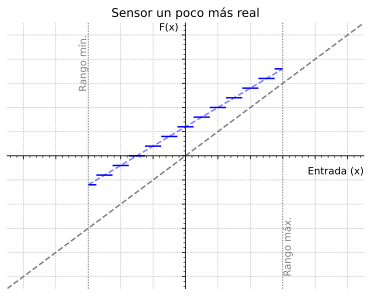

In [228]:
#| label: resolution-real-sensor
#| fig-cap: ""

# Definimos resolución del sensor
resolucion = 0.5
x_min, x_max = -3, 3
offset = 1.2
ganancia = 0.8  # error de sensibilidad

x_vals = np.linspace(x_min, x_max, 100)
# Salidas ideal y real
y_ideal = x_vals
y_real = ganancia * x_vals + offset

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Línea ideal
ax.plot(x_dentro, y_dentro, color='gray', linestyle='dashed')

# Línea real con offset y error de ganancia
ax.plot(x_vals, y_real, color='blue', linestyle='dashed', alpha=0.5)

y_min = ganancia * x_min + offset
y_max = ganancia * x_max + offset

# Dibujar escalones cuantizados sobre la salida real
for y_val in np.linspace(y_min, y_max, int(np.ceil((x_max + resolucion/2 - x_min)/resolucion))):
    # Valor continuo real del sensor
    val = (y_val - offset) / ganancia 
    
    x_left = val - resolucion / 2
    x_right = val + resolucion / 2

    # Recortar si está fuera del rango
    if x_left < x_min:
        x_left = x_min
    if x_right > x_max:
        x_right = x_max

    # Dibujar escalón
    ax.hlines(y_val, x_left, x_right, color='blue')

# # Flechas para marcar error (en extremos)
# for x in [-2.5, 0, 2.5]:
#     y_id = x
#     y_re = ganancia * x + offset
#     ax.annotate('', xy=(x, y_re), xytext=(x, y_id),
#                 arrowprops=dict(arrowstyle='<->', color='red'))
#     # ax.text(x + 0.1, (y_id + y_re)/2, 'Error', color='red', fontsize=8)

# Dibujar ejes en el centro
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Etiquetas en español
ax.set_xlabel('Entrada (x)', loc='right')
# ax.set_ylabel('Salida (F(x))', loc='top')
ax.set_ylabel('F(x)', rotation=0, labelpad=0, loc='top', va='top')

# Ticks visibles pero sin etiquetas
ax.set_xticks(np.arange(-5, 6, 1))
ax.set_yticks(np.arange(-5, 6, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])

# Cuadrículas
ax.minorticks_on()
ax.grid(True, which='major', linestyle='--', linewidth=0.5)
# ax.grid(True, which='minor', linestyle=':', linewidth=0.3)

# Límites
ax.set_xlim(-5.5, 5.5)
ax.set_ylim(-5.5, 5.5)

# Rango del sensor (líneas grises)
ax.axvline(rango_min, color='gray', linestyle=':', linewidth=1)
ax.axvline(rango_max, color='gray', linestyle=':', linewidth=1)
ax.text(rango_min, 5, 'Rango mín.', rotation=90, ha='right', va='top', color='gray')
ax.text(rango_max, -5, 'Rango máx.', rotation=90, ha='left', va='bottom', color='gray')

# Título y leyenda
plt.title('Sensor un poco más real')
# ax.legend(loc='upper left')

plt.show()

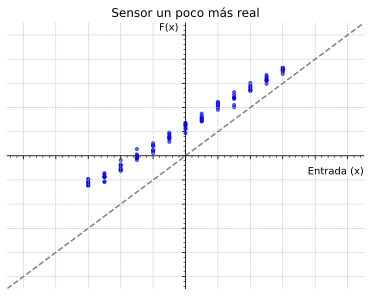

In [229]:
#| label: precision-real-sensor
#| fig-cap: ""

np.random.seed(42)

# Definimos resolución del sensor
resolucion = 0.5
x_min, x_max = -3, 3
k = 0.08  # constante que define cuánta dispersión por unidad de x
num_medidas = 8  # cantidad de mediciones por x

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Dibujar línea ideal del sensor
x_dentro = np.linspace(-5.5, 5.5, 100)
y_dentro = x_dentro
ax.plot(x_dentro, y_dentro, color='gray', linestyle='dashed')

# Simular mediciones con dispersión proporcional a |x^2|
# for val in np.arange(x_min, x_max + resolucion/2, resolucion):
#     y_val = np.floor(val / resolucion) * resolucion
#     x_left = val - resolucion / 2
#     x_right = val + resolucion / 2
    
#     if x_left < x_min:
#         x_left = x_min
    
#     if x_right > x_max:
#         x_right = x_max

#     dispersion = k * abs(val**2)
#     y_mediciones = np.random.normal(loc=y_val, scale=dispersion, size=num_medidas)
#     ax.scatter([val]*num_medidas, y_mediciones, color='blue', s=10, alpha=0.6)

for y_val in np.linspace(y_min, y_max, int(np.ceil((x_max + resolucion/2 - x_min)/resolucion))):
    # Valor continuo real del sensor
    val = (y_val - offset) / ganancia 
    
    x_left = val - resolucion / 2
    x_right = val + resolucion / 2

    # Recortar si está fuera del rango
    if x_left < x_min:
        x_left = x_min
    if x_right > x_max:
        x_right = x_max

    # dispersion = k * abs(val**2)
    dispersion = 0.15
    y_mediciones = np.random.normal(loc=y_val, scale=dispersion, size=num_medidas)
    ax.scatter([val]*num_medidas, y_mediciones, color='blue', s=10, alpha=0.6)

# Dibujar ejes en el centro
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Etiquetas en español
ax.set_xlabel('Entrada (x)', loc='right')
ax.set_ylabel('F(x)', rotation=0, labelpad=0, loc='top', va='top')

# Ticks visibles pero sin etiquetas
ax.set_xticks(np.arange(-5, 6, 1))
ax.set_yticks(np.arange(-5, 6, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])

# Cuadrículas
ax.minorticks_on()
ax.grid(True, which='major', linestyle='--', linewidth=0.5)
# ax.grid(True, which='minor', linestyle=':', linewidth=0.3)

# Límites
ax.set_xlim(-5.5, 5.5)
ax.set_ylim(-5.5, 5.5)

# Rango del sensor (líneas grises)
# ax.axvline(rango_min, color='gray', linestyle=':', linewidth=1)
# ax.axvline(rango_max, color='gray', linestyle=':', linewidth=1)
# ax.text(rango_min, 5, 'Rango mín.', rotation=90, ha='right', va='top', color='gray')
# ax.text(rango_max, -5, 'Rango máx.', rotation=90, ha='left', va='bottom', color='gray')

# Título y leyenda
plt.title('Sensor un poco más real')
plt.show()

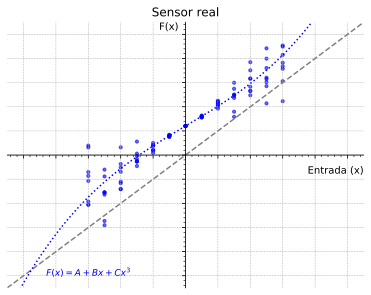

In [382]:
#| label: precision-nonlinear-sensor
#| fig-cap: ""

np.random.seed(42)

# Definimos resolución del sensor
resolucion = 0.5
x_min, x_max = -3, 3
k = 0.15  # constante que define cuánta dispersión por unidad de x
num_medidas = 8  # cantidad de mediciones por x

# Curva no lineal: ejemplo típico con término cúbico
def sensor_real(x):
    return offset + ganancia * x + 0.02 * x**3  # sensor no lineal

# Línea ideal (y = x)
x_vals = np.linspace(-5.5, 5.5, 200)
y_ideal = x_vals
y_real = sensor_real(x_vals)

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Dibujar línea ideal
ax.plot(x_vals, y_ideal, color='gray', linestyle='dashed', label='Sensor ideal')

# Dibujar curva no lineal
ax.plot(x_vals, y_real, color='blue', linestyle='dotted', label='Sensor real no lineal')
ax.text(-4.3, -5, r"$F(x) = A + B x + C x^3$", fontsize=9, color='blue')

# Cuantización de la curva no lineal
x_step_centers = np.arange(x_min, x_max + resolucion/2, resolucion)

for x_c in x_step_centers:
    # Valor central
    y_val = sensor_real(x_c)
    
    # Extremos del escalón horizontal
    x_left = x_c - resolucion / 2
    x_right = x_c + resolucion / 2

    # Recorte a los límites visibles
    if x_left < x_min:
        x_left = x_min
    if x_right > x_max:
        x_right = x_max

    dispersion = k * abs(x_c**2)
    y_mediciones = np.random.normal(loc=y_val, scale=dispersion, size=num_medidas)
    ax.scatter([x_c]*num_medidas, y_mediciones, color='blue', s=10, alpha=0.6)

# Dibujar ejes en el centro
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Etiquetas en español
ax.set_xlabel('Entrada (x)', loc='right')
ax.set_ylabel('F(x)', rotation=0, labelpad=0, loc='top', va='top')

# Ticks visibles pero sin etiquetas
ax.set_xticks(np.arange(-5, 6, 1))
ax.set_yticks(np.arange(-5, 6, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])

# Cuadrículas
ax.minorticks_on()
ax.grid(True, which='major', linestyle='--', linewidth=0.5)
# ax.grid(True, which='minor', linestyle=':', linewidth=0.3)

# Límites
ax.set_xlim(-5.5, 5.5)
ax.set_ylim(-5.5, 5.5)

# Rango del sensor (líneas grises)
# ax.axvline(rango_min, color='gray', linestyle=':', linewidth=1)
# ax.axvline(rango_max, color='gray', linestyle=':', linewidth=1)
# ax.text(rango_min, 5, 'Rango mín.', rotation=90, ha='right', va='top', color='gray')
# ax.text(rango_max, -5, 'Rango máx.', rotation=90, ha='left', va='bottom', color='gray')

# Título y leyenda
plt.title('Sensor real')
plt.show()

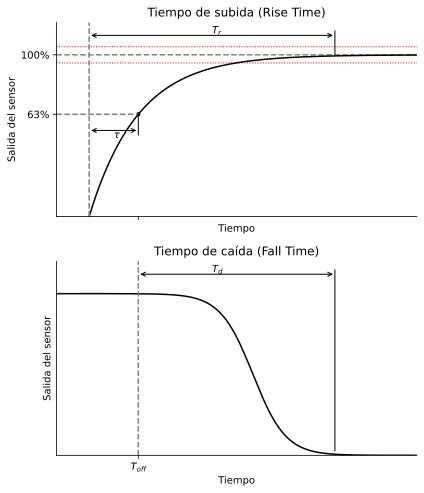

In [371]:
#| label: response-time-sensor
#| fig-cap: ""

# Parámetros
t = np.linspace(0, 15, 1000)
tau = 1.5  # constante de tiempo
final_value = 1

# Respuestas exponenciales
rise_curve = final_value * (1 - np.exp(-t / tau))
fall_curve = final_value * np.exp(-t / tau)

# Banda de tolerancia (±5%)
upper_tol = final_value * 1.05
lower_tol = final_value * 0.95
settling_time = 5 * tau  # tiempo de establecimiento aproximado

# Crear la figura con dos subgráficos
fig, axs = plt.subplots(2, 1, figsize=(6, 7), sharex=True)

# --- Rise Time ---
axs[0].axhline(final_value, color='gray', linestyle='--', label='Valor final')
axs[0].axhline(upper_tol, color='red', linestyle=':', linewidth=1, label='Banda de tolerancia')
axs[0].axhline(lower_tol, color='red', linestyle=':', linewidth=1)
axs[0].plot(t, rise_curve, label='Respuesta del sensor', color='black')

# Marcar constante de tiempo τ
axs[0].axvline(0.0, color='gray', linestyle='--')

# Barra horizontal de 0 a t_est
axs[0].annotate('', xy=(0, 1.12), xytext=(settling_time, 1.12), arrowprops=dict(arrowstyle='<->'))
axs[0].text((settling_time)/2, 1.12, r'$T_r$', ha='left', va='bottom')
axs[0].vlines(x=settling_time, ymin=1, ymax=1.15, color='black', linewidth=1)

y_tau = (1-1/np.e)
axs[0].hlines(y=y_tau, xmin=-1, xmax=tau, color='gray', linestyle='dashed')
axs[0].vlines(x=tau, ymin=y_tau-0.13, ymax=y_tau, color='black', linewidth=1)
axs[0].annotate('', xy=(0, y_tau-0.1), xytext=(tau, y_tau-0.1), arrowprops=dict(arrowstyle='<->'))
axs[0].text(tau/2, y_tau-0.1, r'$\tau$', ha='left', va='top')
axs[0].scatter(tau, y_tau, color='black', s=10)

axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# Ticks visibles pero sin etiquetas
axs[0].set_xticks([])
axs[0].set_xticklabels([])
y_ticks = [y_tau, 1]
axs[0].set_yticks(y_ticks)
axs[0].set_yticklabels(['{:,.0%}'.format(_) for _ in y_ticks])

# Límites
axs[0].set_xlim(-1, 10)
axs[0].set_ylim(0, 1.2)

axs[0].set_ylabel('Salida del sensor')
axs[0].set_xlabel('Tiempo')
axs[0].set_title('Tiempo de subida (Rise Time)')

# --- Fall Time ---
# Parámetros
t = np.linspace(-1, 10, 1000)
k = 2 # pendiente (más alto = más abrupto)
t_start = -5
t_end = 5
amplitude = 1

# Curva "S" acostada
sigmoid_start = 1 / (1 + np.exp(-k * (t - t_start)))
sigmoid_end   = 1 / (1 + np.exp(-k * (t - t_end)))
s_curve = amplitude * (sigmoid_start - sigmoid_end)

axs[1].plot(t, s_curve, color='black')

# Referencias
# axs[1].axhline(0, color='gray', linestyle='--')
# axs[1].axhline(amplitude, color='gray', linestyle='--')
# axs[1].axvline(t_start, color='green', linestyle='--', label='Inicio de transición')
# axs[1].axvline(t_end, color='purple', linestyle='--', label='Fin de transición')

# Barra horizontal de 0 a t_est
axs[1].annotate('', xy=(tau, 1.12), xytext=(settling_time, 1.12), arrowprops=dict(arrowstyle='<->'))
axs[1].text((settling_time)/2, 1.12, r'$T_d$', ha='left', va='bottom')
axs[1].vlines(x=settling_time, ymin=0.025, ymax=1.15, color='black', linewidth=1)

axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Ticks visibles pero sin etiquetas
axs[1].set_xticks([tau])
axs[1].set_xticklabels([r'$T_{off}$'])
axs[1].set_yticks([])
axs[1].set_yticklabels([])

# Límites
axs[1].set_xlim(-1, 10)
axs[1].set_ylim(0, 1.2)

# Marcar constante de tiempo τ
axs[1].axvline(tau, color='gray', linestyle='--')

axs[1].set_ylabel('Salida del sensor')
axs[1].set_xlabel('Tiempo')
axs[1].set_title('Tiempo de caída (Fall Time)')

plt.tight_layout()
plt.show()